## GRIP @ The Sparks Foundation 
## Task 1 : Prediction using Supervised Machine Learning

## Author: Mahesh Reddy

This is a simple linear regression task as it involves just two variables.
In this regression task I tried to predict the percentage of marks a student is expected to score based upon the number of hours they studied.

In [1]:
#importing pandas 
import pandas as pd
#reading the data from url as csv file
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
#shape of the csv file
df.shape

(25, 2)

In [2]:
#checking if the data frame has any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [3]:
#Summary of the dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


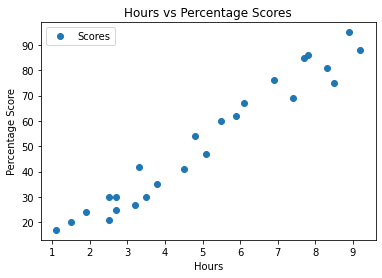

In [4]:
#importing matplotlib.pyplot
import matplotlib.pyplot as plt
#Checking Linearity
df.plot("Hours","Scores",style='o')
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.title("Hours vs Percentage Scores")
plt.show()

As we can see,The graph shows that there exists a linear relationship between the variables.so,we can proceed further.

<AxesSubplot:>

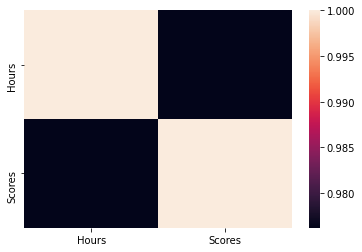

In [5]:
# Importing seaborn 
import seaborn as sns
#Plotting the correlation heatmap
sns.heatmap(df.corr())

In [6]:
#Dividing the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [7]:
#importing required packages for regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
#Training the Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

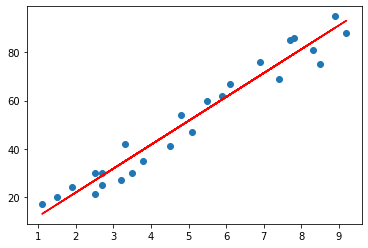

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

In [9]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


<AxesSubplot:title={'center':'Comaparison between Actual and Predicted Score Values'}>

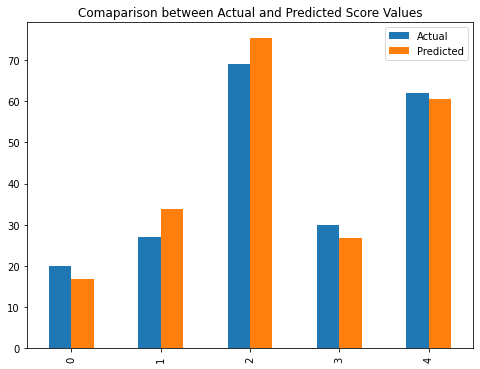

In [12]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(8,6), title= "Comaparison between Actual and Predicted Score Values")

In [13]:
#import numpy
import numpy as np
#Finding Accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


## The Accuracy of the model is 94.5%

In [14]:
# Testing the model with our data for 9.25 hours and predicting score
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## The predicted score of the student is 93.69173248737539 if he studies for 9.25 hours.